In [1]:
from sklearn.datasets import make_blobs
x_b, y_b = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [2]:
from sklearn.datasets import make_moons
x_m, y_m = make_moons(n_samples=3000, noise=0.1, random_state=42)
# Here I tried n_samples=3000, because when increasing the number of samples it looks like DBSCAN works better than KMeans

In [2]:
import matplotlib.pyplot as plt

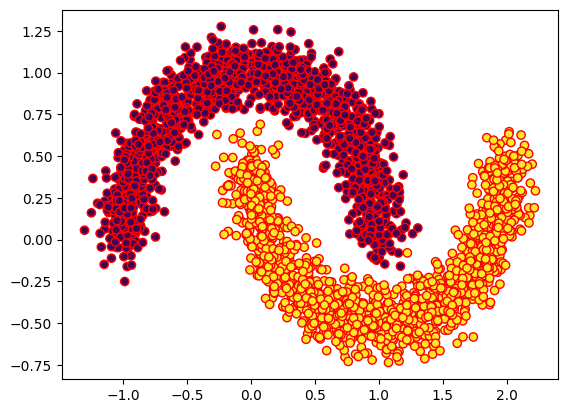

In [ ]:
plt.scatter(x_m[:, 0], x_m[:, 1], c=y_m, edgecolors='r')

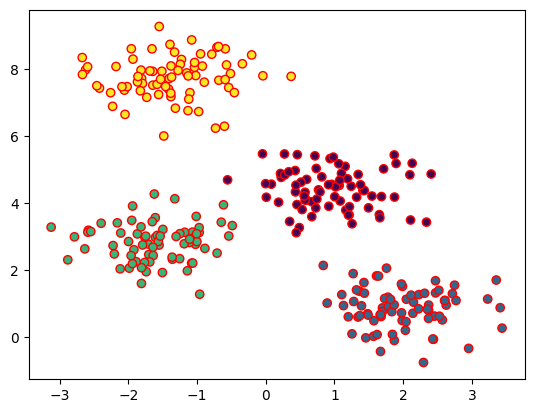

In [68]:
plt.scatter(x_b[:, 0], x_b[:, 1], c=y_b, edgecolor="r")
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [6]:
Kmeans = KMeans(n_clusters=2, random_state=42)
Kmeans.fit(x_m)
#Here we can change x_m with x_b to try for make_blobs

KMeans(n_clusters=2, random_state=42)

In [7]:
labels = Kmeans.labels_
centroids = Kmeans.cluster_centers_

In [8]:
print("cluster labels : ", labels)
print("cluster centers : ", centroids)

cluster labels :  [0 0 1 ... 0 0 0]
cluster centers :  [[-0.19030845  0.57420044]
 [ 1.2126374  -0.07862243]]


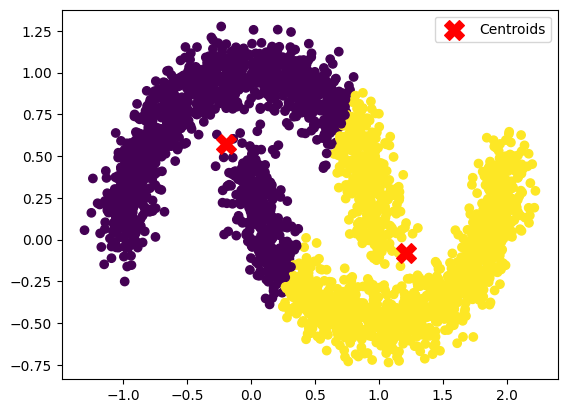

In [9]:
plt.scatter(x_m[:, 0], x_m[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.show()

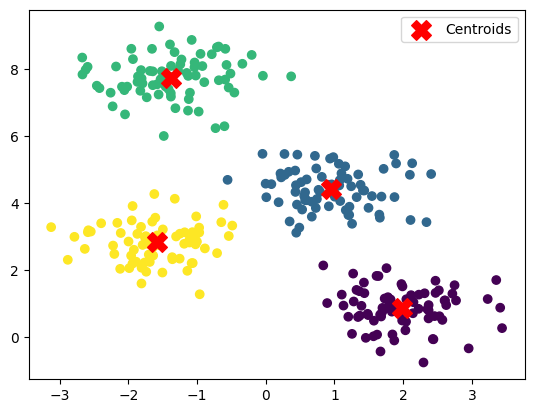

In [4]:
Kmeans = KMeans(n_clusters=4, random_state=42)
Kmeans.fit(x_b)
labels = Kmeans.labels_
centroids = Kmeans.cluster_centers_
plt.scatter(x_b[:, 0], x_b[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2, linkage="ward")
hierarchical.fit(x_m)

AgglomerativeClustering()

In [11]:
labela = hierarchical.labels_

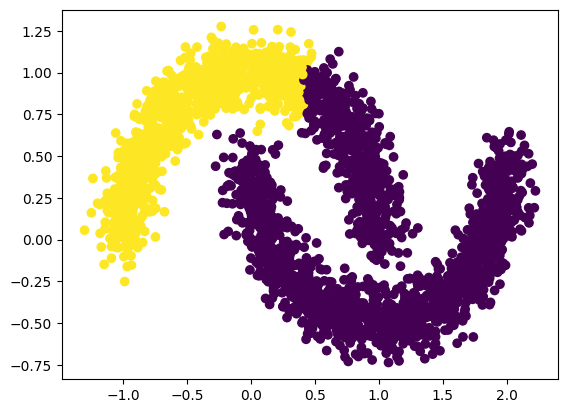

In [12]:
plt.scatter(x_m[:, 0], x_m[:, 1], c=labela, cmap='viridis')
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
Dbscan = DBSCAN(eps=0.1, min_samples=15, metric="euclidean")
Dbscan.fit(x_m)

DBSCAN(eps=0.1, min_samples=15)

In [14]:
labels = Dbscan.labels_
labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

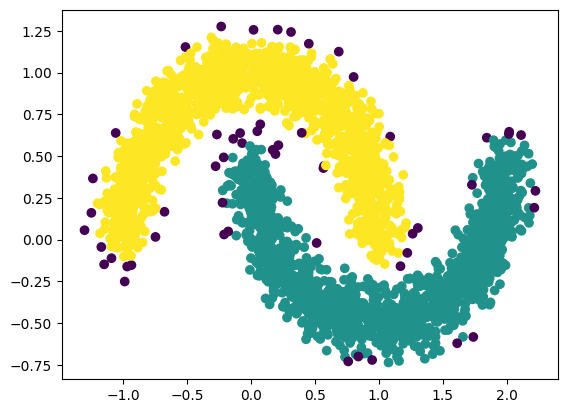

In [15]:
plt.scatter(x_m[:, 0], x_m[:, 1], c=labels, cmap='viridis')
plt.show()

In [16]:
inertia = []
k_values = range(1,11)
for k in k_values:
    Kmeans = KMeans(n_clusters=k, random_state=42)
    Kmeans.fit(x_m)
    inertia.append(Kmeans.inertia_)

In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_m, labels)
print("Silhouette Score = ", score)

Silhouette Score =  0.23706597441256297


Text(0, 0.5, 'Elbow inertia')

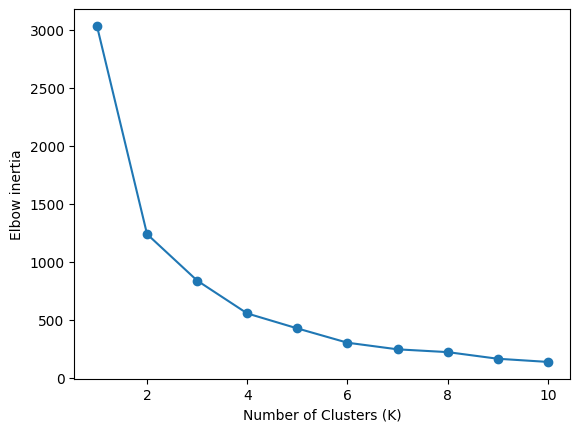

In [18]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Elbow inertia')

In [19]:
scores = []
k_values = range(2,11)
for k in k_values:
    Kmeans = KMeans(n_clusters=k, random_state=42)
    Kmeans.fit(x_m)
    sil_score = silhouette_score(x_m, Kmeans.labels_)
    scores.append(sil_score)

Text(0.5, 1.0, 'KMeans clustering in make_moons dataset')

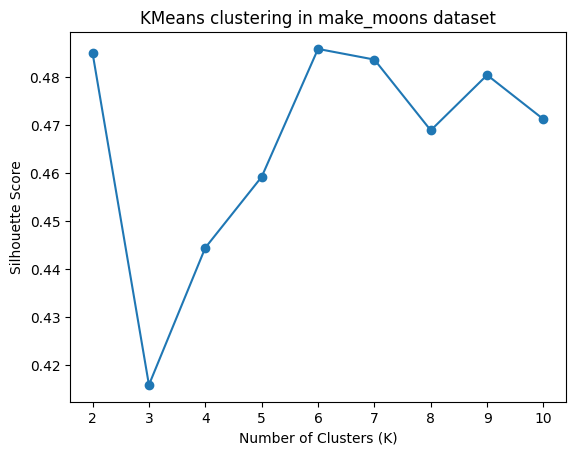

In [20]:
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('KMeans clustering in make_moons dataset')